In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn

device = "mps" if torch.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


In [3]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

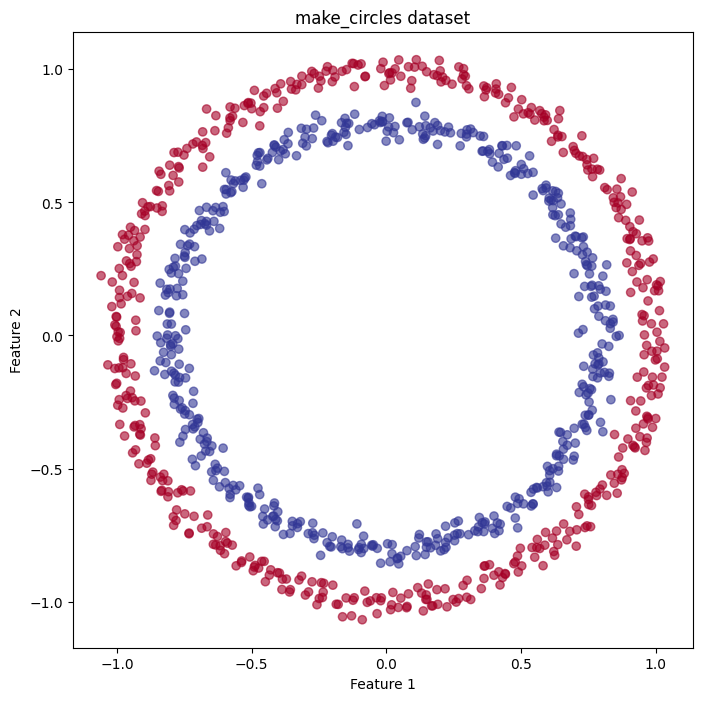

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, c=y, cmap=plt.cm.RdYlBu)
plt.title("make_circles dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# Make DataFrame of circles data
circles = pd.DataFrame({"Feature 1": X[:, 0], "Feature 2": X[:, 1], "Label": y})
circles.head(10)

,Feature 1,Feature 2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
# Check shapes
print(f"Feature shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Feature shape: (1000, 2)
Labels shape: (1000,)


In [7]:
# Convert to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [8]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# View size of training and testing data
print(f"Training feature shape: {X_train.shape}"
      f"\nTraining labels shape: {y_train.shape}"
      f"\nTesting feature shape: {X_test.shape}"
      f"\nTesting labels shape: {y_test.shape}")

Training feature shape: torch.Size([800, 2])
Training labels shape: torch.Size([800])
Testing feature shape: torch.Size([200, 2])
Testing labels shape: torch.Size([200])


In [10]:
# Manually create a model by subclassing nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
    
    def forward(self, x):
        return self.layer_2(self.layer_1(x))
    
model_0 = CircleModelV0().to(device)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.4137, -0.0605],
                      [ 0.5694,  0.3157],
                      [-0.4399,  0.4295],
                      [-0.6882,  0.1383],
                      [-0.3477, -0.1530]], device='mps:0')),
             ('layer_1.bias',
              tensor([ 0.1793,  0.0437, -0.1086, -0.7034, -0.3014], device='mps:0')),
             ('layer_2.weight',
              tensor([[-0.3667, -0.1734,  0.1379,  0.2275, -0.0653]], device='mps:0')),
             ('layer_2.bias', tensor([0.0554], device='mps:0'))])

In [11]:
# Create a model using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3370,  0.1371],
                      [ 0.5877, -0.4001],
                      [ 0.4513,  0.0651],
                      [ 0.0452,  0.1099],
                      [ 0.4148,  0.2652]], device='mps:0')),
             ('0.bias',
              tensor([ 0.4820, -0.2087,  0.1088,  0.1847,  0.3295], device='mps:0')),
             ('1.weight',
              tensor([[ 0.1570, -0.2815,  0.3203,  0.2226, -0.2576]], device='mps:0')),
             ('1.bias', tensor([-0.1389], device='mps:0'))])

In [12]:
# Set up the loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss() # Binary Cross Entropy Loss
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [13]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

In [14]:
# Train the model

epochs = 100

for epoch in range(epochs):
    model_0.train()

    # Forward pass
    y_logits = model_0(X_train.to(device)).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train.to(device))
    acc = accuracy_fn(y_true=y_train.to(device), y_pred=y_pred)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.2f}%")

Epoch: 0 | Loss: 0.6951 | Accuracy: 49.75%
Epoch: 10 | Loss: 0.6947 | Accuracy: 49.50%
Epoch: 20 | Loss: 0.6943 | Accuracy: 49.50%
Epoch: 30 | Loss: 0.6940 | Accuracy: 48.88%
Epoch: 40 | Loss: 0.6938 | Accuracy: 49.38%
Epoch: 50 | Loss: 0.6936 | Accuracy: 49.50%
Epoch: 60 | Loss: 0.6935 | Accuracy: 49.50%
Epoch: 70 | Loss: 0.6934 | Accuracy: 49.75%
Epoch: 80 | Loss: 0.6933 | Accuracy: 49.88%
Epoch: 90 | Loss: 0.6932 | Accuracy: 50.25%


In [15]:
import requests
from pathlib import Path

# download helper functions from Learn PyTorch repo (if you haven't already)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    print("Downloading helper_functions.py...")
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py"
    response = requests.get(url)
    with open("helper_functions.py", "wb") as f:
        f.write(response.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download.


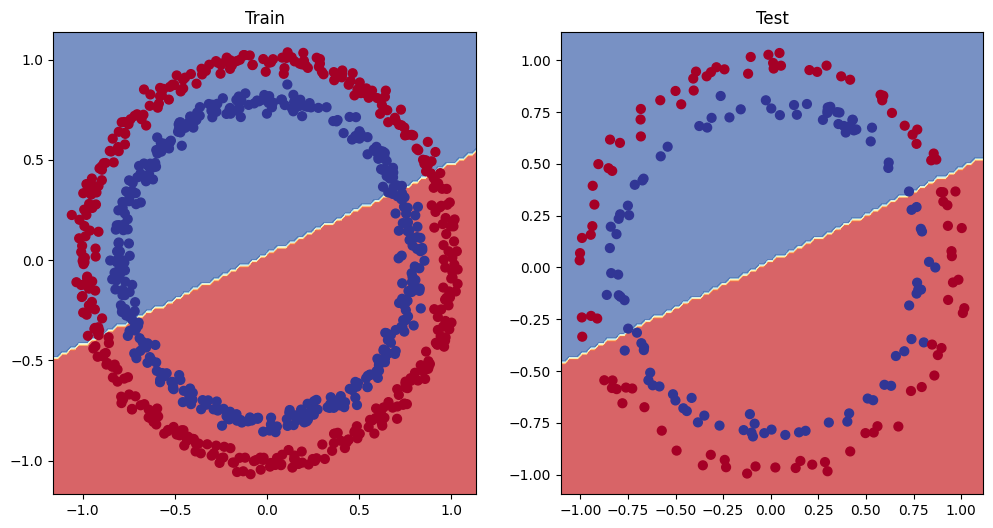

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

plt.show()